In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

def test_loss(x_in, y_in, weights1, weights2, biases1, biases2):
        out2 = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
        loss = []
        for iter in range(out2.shape[1]):
            loss.append(MSE(out2[:, iter], y_in[:, iter]))
        return np.mean(loss)

def pred_out(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        return out2

def acc_out(x_in, y_in, weights1, weights2, biases1, biases2):
    pred = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
    sum_acc = 0
    for iter in range(pred.shape[1]):
#         print(iter)
        sum_acc+=(np.argmax(pred[:, iter])==np.argmax(y_in[:, iter]))
    return sum_acc/y_in.shape[1]

def MSE(yHat, y):
    return np.sum(np.multiply(yHat - y, yHat - y)) / y.size

def cross_entropy(predictions, targets, epsilon=1e-5):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.multiply(np.log(predictions),targets)) 
    return ce

In [3]:
##Load and segregate the data
letters = genfromtxt('energy_eff.csv', delimiter=',')
np.random.shuffle(letters)
print(letters.shape)
x_in = letters[:, 0:8]
x_mean = np.mean(x_in, axis = 0)
x_std = np.std(x_in, axis = 0)
y_in = letters[:, 8:10]
y_mean = np.mean(y_in, axis=0)
y_std = np.std(y_in, axis = 0)
# y_in = (y_in-y_mean)/y_std
x_in = (x_in-x_mean)/x_std
# print(np.std(y_in, axis=0))

(768, 10)


In [4]:
x_train = x_in[0:int(x_in.shape[0]*0.7), :]
y_train = y_in[0:int(x_in.shape[0]*0.7), :]

x_test = x_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]
y_test = y_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]

In [5]:
hidden_size = 10
learning_rate = 0.001
num_epochs = 1000

weights1 = np.random.normal(size=(x_in.shape[1], hidden_size))
weights2 = np.random.normal(size=(hidden_size, y_in.shape[1]))
print(weights1.shape)
print(weights2.shape)
biases1 = np.random.normal(size=(hidden_size, 1))
biases2 = np.random.normal(size=(y_in.shape[1], 1))

x_train = np.matrix(x_train)
x_train = x_train.T
y_train = np.matrix(y_train)
y_train = y_train.T

x_test = np.matrix(x_test)
x_test = x_test.T
y_test = np.matrix(y_test)
y_test = y_test.T

(8, 10)
(10, 2)


In [6]:
accuracies_train = []
accuracies_test = [0]
losses = [0]
test_losses = [0]
for epoch_num in range(num_epochs):
    if epoch_num%5==1:
        print("test_accuracies : ", accuracies_test[-1])
        print("test_loss : ", test_losses[-1])
        print("train_loss : ", losses[-1])
        print("epoch_num : ", epoch_num)
    for sample_num in range(x_train.shape[1]):
#         if(sample_num%100==0):
#         print("sample_num : ", sample_num)
        #Forward propagation
        out1_temp = np.matmul(weights1.T, x_train[:,sample_num])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        #Back-propogation
        error_out = out2-y_train[:, sample_num]
        err_2 = np.matrix(error_out)
        grad_2 = np.matmul(out1, err_2.T)
        err_1 = np.multiply(np.matmul(weights2, err_2), np.multiply(out1, np.ones(out1.shape)-out1))
        grad_1 = np.multiply(x_train[:, sample_num], err_1.T)
        #Updating the weights
#         print(weights1)
        biases1 = biases1 - learning_rate*err_1
        biases2 = biases2 - learning_rate*err_2
        weights1 = weights1-learning_rate*grad_1
        weights2 = weights2-learning_rate*grad_2
#         print(cross_entropy(out2, y_train[:, sample_num]))
        #Updating the accuracy and loss
        #End of for loop
#     print("accuracy : ", np.mean(acc_arr))
    test_losses.append(test_loss(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_test.append(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_train.append(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
    losses.append(test_loss(x_train, y_train, weights1, weights2, biases1, biases2))
    

test_accuracies :  0
test_loss :  29.75354961481233
train_loss :  23.618484705551253
epoch_num :  1
test_accuracies :  0
test_loss :  11.327626790087301
train_loss :  9.379845807969001
epoch_num :  6
test_accuracies :  0
test_loss :  9.973262413431245
train_loss :  8.02083645586244
epoch_num :  11
test_accuracies :  0
test_loss :  9.175482164159188
train_loss :  7.281461279344217
epoch_num :  16
test_accuracies :  0
test_loss :  8.509597938124042
train_loss :  6.789375887979585
epoch_num :  21
test_accuracies :  0
test_loss :  7.874657238141396
train_loss :  6.385620517519417
epoch_num :  26
test_accuracies :  0
test_loss :  7.282474060600906
train_loss :  6.011412799122345
epoch_num :  31
test_accuracies :  0
test_loss :  6.767158811207754
train_loss :  5.647805721993913
epoch_num :  36
test_accuracies :  0
test_loss :  6.309003431698291
train_loss :  5.30104389087586
epoch_num :  41
test_accuracies :  0
test_loss :  5.8905508034607035
train_loss :  4.978183674393061
epoch_num :  46
t

test_accuracies :  0
test_loss :  1.8931973630109624
train_loss :  1.333585860362403
epoch_num :  406
test_accuracies :  0
test_loss :  1.891583436705198
train_loss :  1.329431508386561
epoch_num :  411
test_accuracies :  0
test_loss :  1.8900421395430196
train_loss :  1.3254128206616498
epoch_num :  416
test_accuracies :  0
test_loss :  1.888559275138235
train_loss :  1.3215239114833854
epoch_num :  421
test_accuracies :  0
test_loss :  1.8871239005480285
train_loss :  1.3177602191736673
epoch_num :  426
test_accuracies :  0
test_loss :  1.885727378701496
train_loss :  1.3141178033937035
epoch_num :  431
test_accuracies :  0
test_loss :  1.8843626672436653
train_loss :  1.3105929156771106
epoch_num :  436
test_accuracies :  0
test_loss :  1.8830238366994951
train_loss :  1.3071817569927782
epoch_num :  441
test_accuracies :  0
test_loss :  1.8817057666442791
train_loss :  1.303880362065515
epoch_num :  446
test_accuracies :  0
test_loss :  1.8804039638581882
train_loss :  1.3006845673

test_accuracies :  0
test_loss :  1.7969696529278212
train_loss :  1.1848709078764084
epoch_num :  806
test_accuracies :  0
test_loss :  1.7962665239926436
train_loss :  1.1839658027083186
epoch_num :  811
test_accuracies :  0
test_loss :  1.7955769162085453
train_loss :  1.1830729969674643
epoch_num :  816
test_accuracies :  0
test_loss :  1.794900417157055
train_loss :  1.1821923035433608
epoch_num :  821
test_accuracies :  0
test_loss :  1.7942366176290885
train_loss :  1.1813235360886079
epoch_num :  826
test_accuracies :  0
test_loss :  1.7935851125836648
train_loss :  1.180466509052107
epoch_num :  831
test_accuracies :  0
test_loss :  1.792945501993441
train_loss :  1.1796210377190004
epoch_num :  836
test_accuracies :  0
test_loss :  1.7923173915854607
train_loss :  1.1787869382565845
epoch_num :  841
test_accuracies :  0
test_loss :  1.791700393485436
train_loss :  1.1779640277654442
epoch_num :  846
test_accuracies :  0
test_loss :  1.7910941267733747
train_loss :  1.17715212

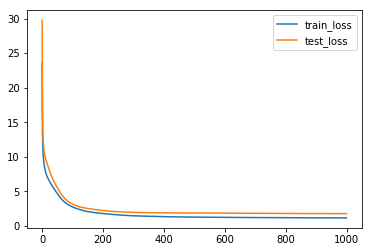

In [11]:
import matplotlib.pyplot as plt
# plt.subplot(211)
plt.plot(losses[1:], label = 'train_loss')
plt.plot(test_losses[1:], label = 'test_loss')
plt.legend()
plt.show()
# plt.subplot(212)
# plt.plot(np.multiply(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test, pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test).T)

In [13]:
ind = 101
print(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)[:,5:10])
print(y_test[:,5:10])

[[36.02099539 14.57721285 14.46854963 15.5554453  12.86458578]
 [38.6340822  15.29903166 15.18006334 19.09571778 14.1094213 ]]
[[35.56 14.34 14.6  15.19 12.97]
 [41.68 15.32 15.14 19.3  14.27]]


In [9]:
# print(test_losses)
# print(losses)
# print(x_train.shape)
# print(x_test.shape)

In [10]:
# print(weights1)